<a href="https://colab.research.google.com/github/SahithiK792/ML/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded= files.upload()

for filename in uploaded.keys():
  print(filename)

Saving Lab Session Data.xlsx to Lab Session Data.xlsx
Saving iotsim-air-quality-1 (1).csv to iotsim-air-quality-1 (1).csv
Lab Session Data.xlsx
iotsim-air-quality-1 (1).csv


In [ ]:
import pandas as pd

# Load the full Excel file
lab2_excel = pd.ExcelFile("Lab Session Data.xlsx")

# Read the specific sheet needed for A1
thyroid0387_UCI = lab2_excel.parse("thyroid0387_UCI")


Question 2

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# ------------------ Preprocessing Function ------------------
def convert_volume(volume_str):
    """Convert human-readable volume (e.g. 1.91M, 2.5K) to float."""
    if isinstance(volume_str, str):
        if volume_str.endswith('M'):
            return float(volume_str[:-1]) * 1_000_000
        elif volume_str.endswith('K'):
            return float(volume_str[:-1]) * 1_000
        else:
            return float(volume_str.replace(',', ''))
    return volume_str  # Already numeric

def preprocess_irctc_data(df):
    """Clean and prepare IRCTC stock data for regression."""
    df_clean = df.dropna()
    df_clean = df_clean[['Open', 'High', 'Low', 'Volume', 'Price']]

    # Convert Volume to float
    df_clean['Volume'] = df_clean['Volume'].apply(convert_volume)

    X = df_clean[['Open', 'High', 'Low', 'Volume']]
    y = df_clean['Price']
    return X, y


# ------------------ Model Training Function ------------------
def train_regression_model(X_train, y_train):
    """Train Linear Regression model."""
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

# ------------------ Evaluation Function ------------------
def evaluate_model(model, X_test, y_test):
    """Compute MSE, RMSE, MAPE, and R2."""
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, rmse, mape, r2

# ------------------ Main Block ------------------
def main():

    irctc_df = pd.read_excel("Lab Session Data.xlsx", sheet_name="IRCTC Stock Price")

    # Prepare data
    X, y = preprocess_irctc_data(irctc_df)

    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train model
    model = train_regression_model(X_train, y_train)

    # Evaluate
    mse, rmse, mape, r2 = evaluate_model(model, X_test, y_test)

    # Print Results
    print("\n--- A2: Regression Evaluation ---")
    print(f"MSE  : {mse:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2   : {r2:.2f}")

    print("\nAnalysis:")
    if r2 > 0.9:
        print(" Model fits extremely well (Very accurate).")
    elif r2 > 0.7:
        print(" Model is good.")
    else:
        print(" Model might be underfitting or missing key features.")

main()



--- A2: Regression Evaluation ---
MSE  : 164.19
RMSE : 12.81
MAPE : 0.51%
R2   : 1.00

Analysis:
 Model fits extremely well (Very accurate).


Question 3

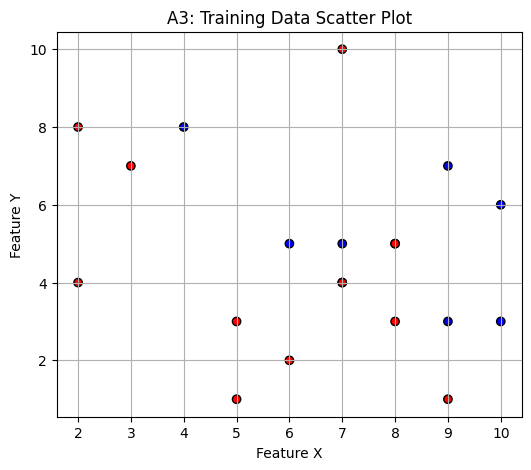

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------ Generate Training Data ------------------
def generate_training_data(n=20, seed=42):
    """Generate random training data of 2D points with two classes."""
    np.random.seed(seed)
    X = np.random.randint(1, 11, size=(n, 2))
    y = np.random.randint(0, 2, size=n)
    return X, y

# ------------------ Plot Training Data ------------------
def plot_training_data(X, y):
    """Scatter plot of training data colored by class."""
    colors = ['blue' if label == 0 else 'red' for label in y]
    plt.figure(figsize=(6, 5))
    plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolor='k')
    plt.title("A3: Training Data Scatter Plot")
    plt.xlabel("Feature X")
    plt.ylabel("Feature Y")
    plt.grid(True)
    plt.show()

# ------------------ Main Block  ------------------
def main():
    X_train, y_train = generate_training_data()
    plot_training_data(X_train, y_train)

main()


Question 4

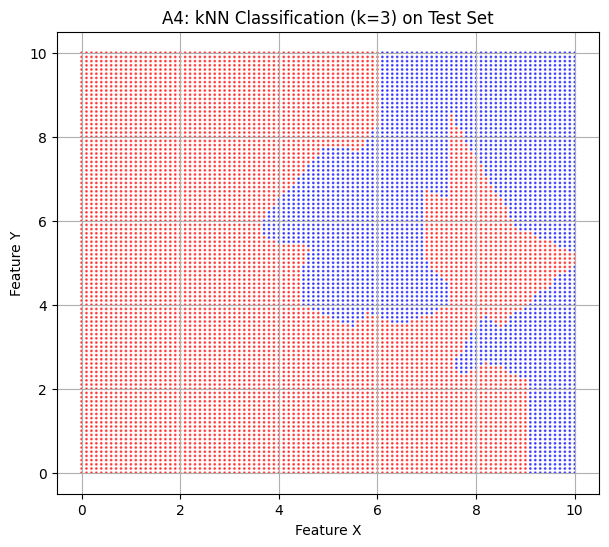

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# ------------------ Generate Training Data ------------------
def generate_training_data(n=20, seed=42):
    """Generate 2D training data (X, y) with two classes."""
    np.random.seed(seed)
    X = np.random.randint(1, 11, size=(n, 2))
    y = np.random.randint(0, 2, size=n)
    return X, y

# ------------------ Generate Test Data ------------------
def generate_test_data(step=0.1):
    """Create a dense test grid of points from (0,0) to (10,10)."""
    x_vals = np.arange(0, 10.1, step)
    y_vals = np.arange(0, 10.1, step)
    xx, yy = np.meshgrid(x_vals, y_vals)
    test_points = np.c_[xx.ravel(), yy.ravel()]
    return test_points, xx, yy

# ------------------ Train and Predict ------------------
def classify_with_knn(X_train, y_train, X_test, k=3):
    """Train kNN and predict test points."""
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

# ------------------ Plot Results ------------------
def plot_test_classification(X_test, y_pred):
    """Scatter plot of test predictions based on class color."""
    colors = ['blue' if label == 0 else 'red' for label in y_pred]
    plt.figure(figsize=(7, 6))
    plt.scatter(X_test[:, 0], X_test[:, 1], c=colors, s=1, alpha=0.6)
    plt.title("A4: kNN Classification (k=3) on Test Set")
    plt.xlabel("Feature X")
    plt.ylabel("Feature Y")
    plt.grid(True)
    plt.show()

# ------------------ Main Block ------------------
def main():
    # Generate training data
    X_train, y_train = generate_training_data()

    # Generate test data
    X_test, xx, yy = generate_test_data()

    # Train kNN with k=3 and classify
    y_pred = classify_with_knn(X_train, y_train, X_test, k=3)

    # Plot classified test points
    plot_test_classification(X_test, y_pred)

main()


Question 5

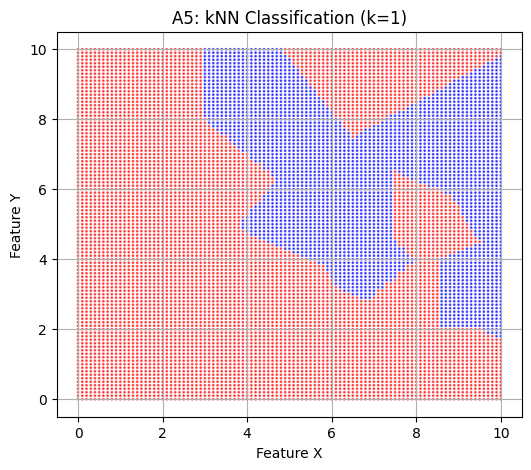

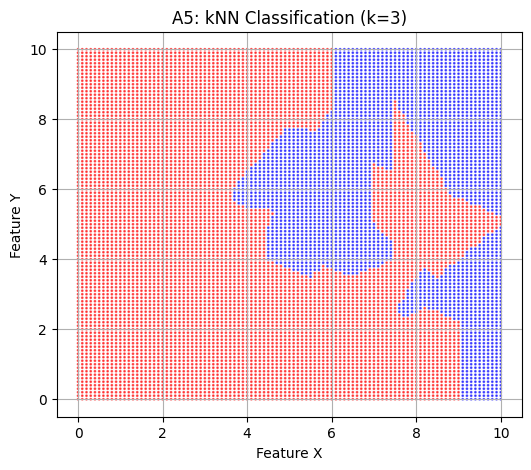

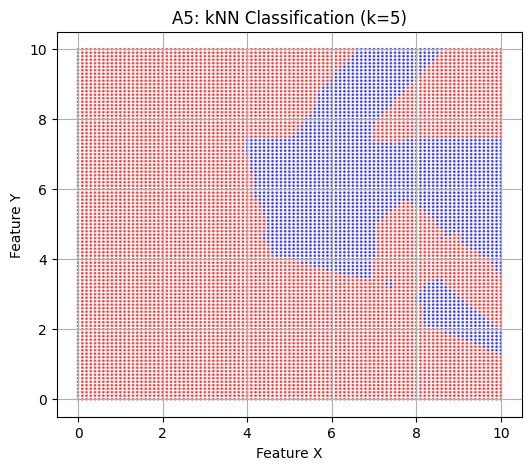

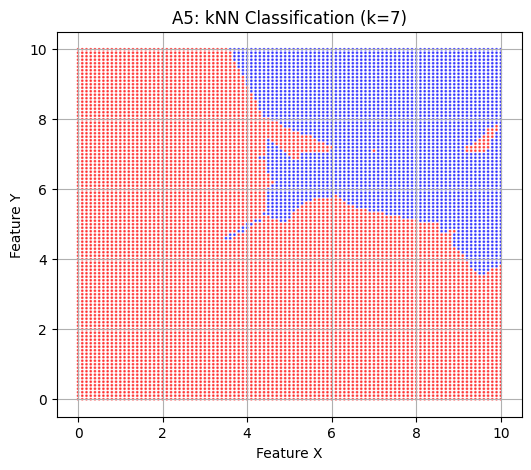

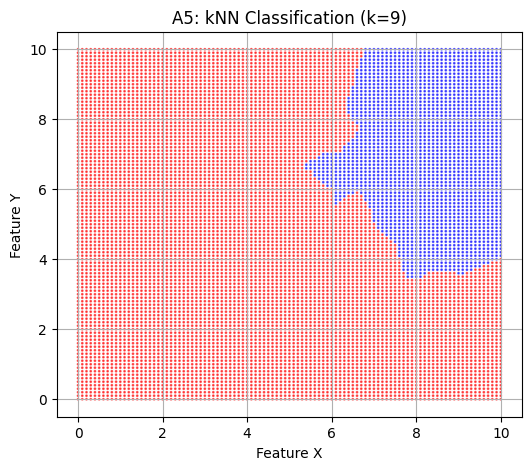

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# ------------------ Generate Training Data ------------------
def generate_training_data(n=20, seed=42):
    """Generate 2D training data with two classes."""
    np.random.seed(seed)
    X = np.random.randint(1, 11, size=(n, 2))
    y = np.random.randint(0, 2, size=n)
    return X, y

# ------------------ Generate Test Data ------------------
def generate_test_data(step=0.1):
    """Generate grid of 2D test points."""
    x_vals = np.arange(0, 10.1, step)
    y_vals = np.arange(0, 10.1, step)
    xx, yy = np.meshgrid(x_vals, y_vals)
    test_points = np.c_[xx.ravel(), yy.ravel()]
    return test_points, xx, yy

# ------------------ Train and Predict ------------------
def classify_with_knn(X_train, y_train, X_test, k):
    """Train kNN with given k and return predicted labels."""
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    return model.predict(X_test)

# ------------------ Plot Classification for a given k ------------------
def plot_classification(X_test, y_pred, k):
    """Plot classified test data with color-coded classes."""
    colors = ['blue' if label == 0 else 'red' for label in y_pred]
    plt.figure(figsize=(6, 5))
    plt.scatter(X_test[:, 0], X_test[:, 1], c=colors, s=1, alpha=0.6)
    plt.title(f"A5: kNN Classification (k={k})")
    plt.xlabel("Feature X")
    plt.ylabel("Feature Y")
    plt.grid(True)
    plt.show()

# ------------------ Main Block ------------------
def main():
    X_train, y_train = generate_training_data()
    X_test, _, _ = generate_test_data()

    # Try different values of k
    for k in [1, 3, 5, 7, 9]:
        y_pred = classify_with_knn(X_train, y_train, X_test, k)
        plot_classification(X_test, y_pred, k)

main()


Question 6

In [ ]:
from google.colab import files
import pandas as pd

# Load the CSV file into a DataFrame
project_df = pd.read_csv("iotsim-air-quality-1 (1).csv")


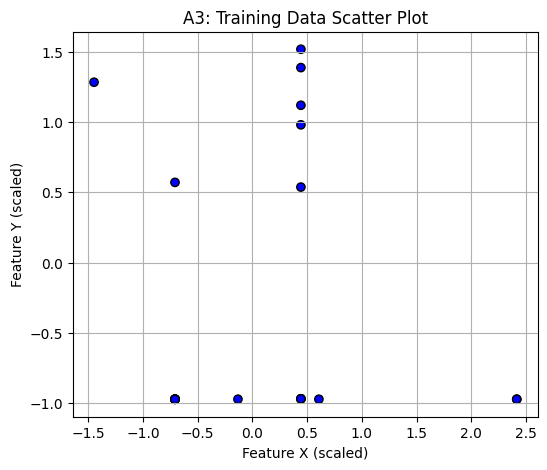

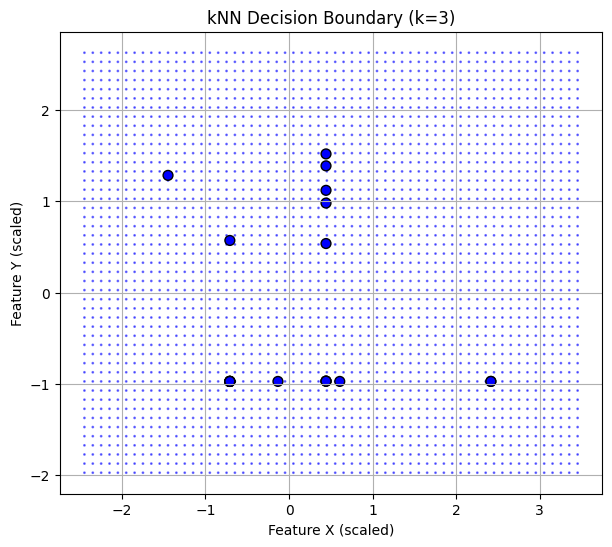

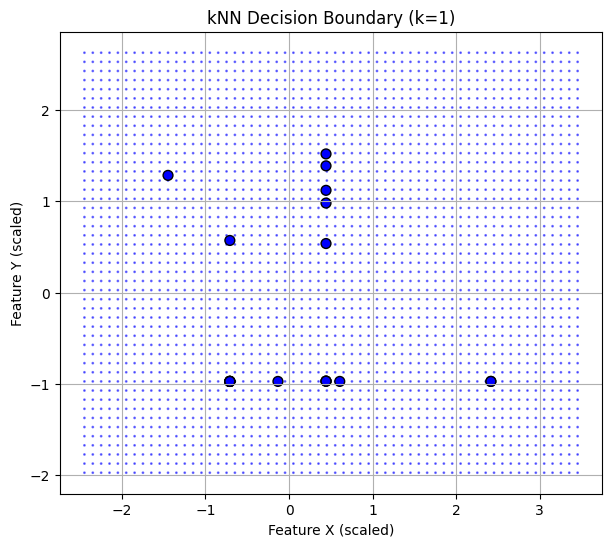

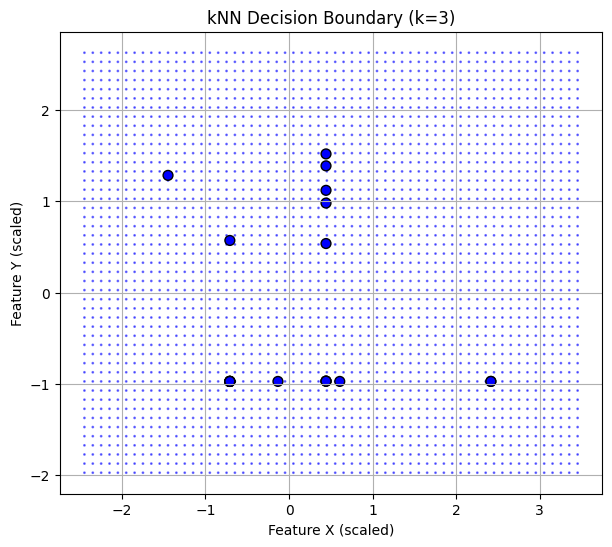

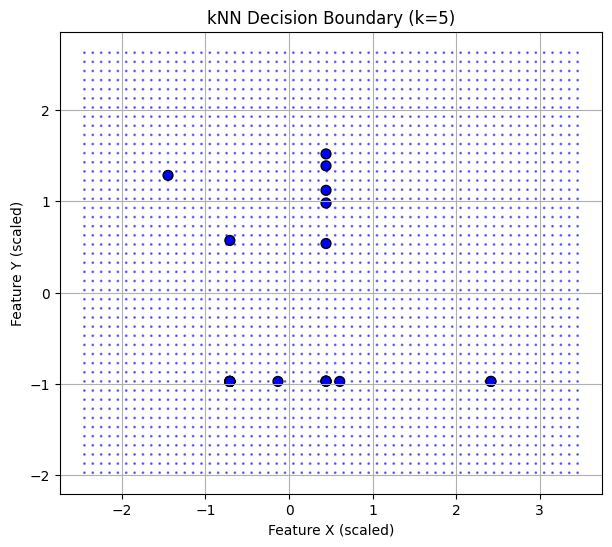

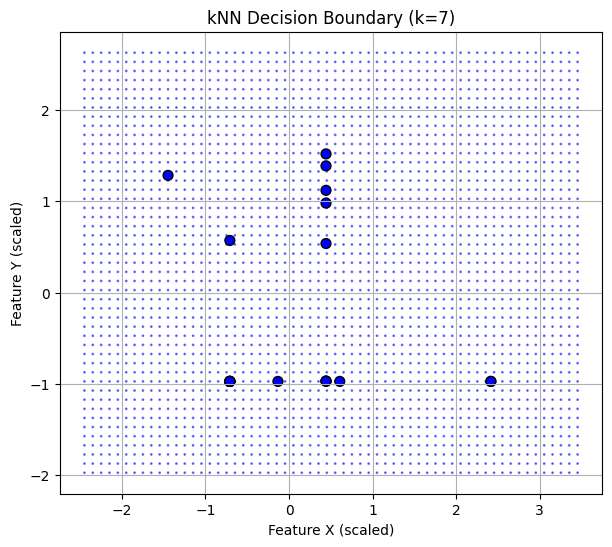

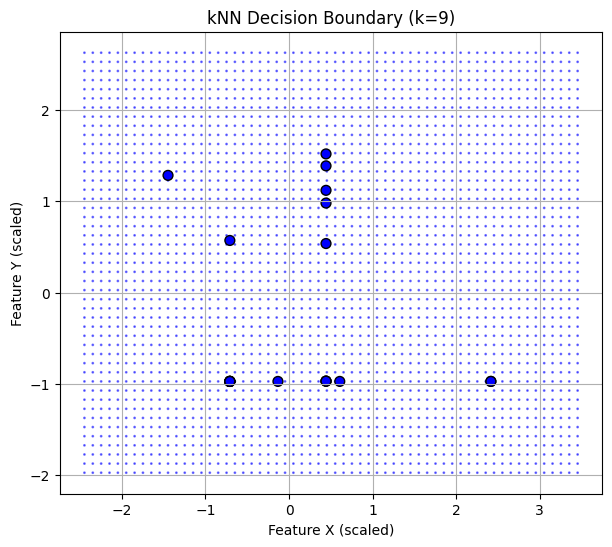

In [ ]:
# A3, A4, A5 combined: Using Project Dataset features to visualize kNN classification boundaries with Scaling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

# ------------------ Preprocessing with Scaling ------------------
def preprocess_project_data(df, feature_cols=['frame.len', 'udp.srcport'], target_col='label'):
    df_clean = df.dropna(subset=feature_cols + [target_col])
    X = df_clean[feature_cols].values
    y = df_clean[target_col].values
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Scale features to balance magnitudes
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y_encoded, le

# ------------------ A3: Scatter Plot of Training Data ------------------
def plot_training_data(X_train, y_train):
    colors = ['blue' if label == 0 else 'red' for label in y_train]
    plt.figure(figsize=(6, 5))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=colors, edgecolor='k')
    plt.title("A3: Training Data Scatter Plot")
    plt.xlabel("Feature X (scaled)")
    plt.ylabel("Feature Y (scaled)")
    plt.grid(True)
    plt.show()

# ------------------ Generate Test Grid ------------------
def generate_test_grid(x_min, x_max, y_min, y_max, step=0.1):
    x_vals = np.arange(x_min, x_max+step, step)
    y_vals = np.arange(y_min, y_max+step, step)
    xx, yy = np.meshgrid(x_vals, y_vals)
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    return grid_points, xx, yy

# ------------------ A4/A5: kNN Classify and Plot Boundary ------------------
def classify_and_plot(X_train, y_train, X_test_grid, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_grid = knn.predict(X_test_grid)

    colors = ['blue' if label == 0 else 'red' for label in y_pred_grid]
    plt.figure(figsize=(7, 6))
    plt.scatter(X_test_grid[:, 0], X_test_grid[:, 1], c=colors, s=1, alpha=0.5)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=['blue' if l == 0 else 'red' for l in y_train], edgecolor='k', marker='o', s=50)
    plt.title(f"kNN Decision Boundary (k={k})")
    plt.xlabel("Feature X (scaled)")
    plt.ylabel("Feature Y (scaled)")
    plt.grid(True)
    plt.show()

# ------------------ Main Block ------------------
def main():

    # Preprocess to get X and y with scaling
    feature_cols = ['frame.len', 'udp.srcport']
    target_col = 'label'
    X, y, label_encoder = preprocess_project_data(project_df, feature_cols, target_col)

    # Sample only 20 random training points as per A3
    np.random.seed(42)
    idx = np.random.choice(len(X), 20, replace=False)
    X_train = X[idx]
    y_train = y[idx]

    # A3: Plot Training Data
    plot_training_data(X_train, y_train)

    # A4/A5: Generate Test Grid in scaled space
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    X_test_grid, _, _ = generate_test_grid(x_min, x_max, y_min, y_max, step=0.1)

    # Classify and plot for k=3 (A4)
    classify_and_plot(X_train, y_train, X_test_grid, k=3)

    # Repeat for various k values (A5)
    for k in [1, 3, 5, 7, 9]:
        classify_and_plot(X_train, y_train, X_test_grid, k)

main()


Question 7

In [7]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

project_df = pd.read_csv("iotsim-air-quality-1 (1).csv")

# ------------------ Preprocess Project Data Function  ------------------
def preprocess_project_data(df, feature_cols=['frame.len', 'udp.srcport'], target_col='label'):
    df_clean = df.dropna(subset=feature_cols + [target_col])
    X = df_clean[feature_cols].values
    y = LabelEncoder().fit_transform(df_clean[target_col])
    return X, y

# ------------------ Grid Search Function ------------------
def perform_grid_search(X, y):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())
    ])

    param_grid = {
        'knn__n_neighbors': [ 3, 5, 7, 9]
    }

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X, y)

    return grid_search.best_params_, grid_search.best_score_

# ------------------ Random Search Function ------------------
def perform_random_search(X, y):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())
    ])

    param_dist = {
        'knn__n_neighbors': np.arange(3, 21)  # Randomly search k from 1 to 20
    }

    random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
    random_search.fit(X, y)

    return random_search.best_params_, random_search.best_score_

# ------------------ Main Block ------------------
def main():
    # Preprocess Data
    X, y = preprocess_project_data(project_df)

    # Perform Grid Search
    grid_best_params, grid_best_score = perform_grid_search(X, y)
    print("\n--- GridSearchCV Results ---")
    print(f"Best k (GridSearchCV): {grid_best_params['knn__n_neighbors']}")
    print(f"Best Cross-Validation Accuracy: {grid_best_score:.2%}")

    # Perform Randomized Search
    random_best_params, random_best_score = perform_random_search(X, y)
    print("\n--- RandomizedSearchCV Results ---")
    print(f"Best k (RandomizedSearchCV): {random_best_params['knn__n_neighbors']}")
    print(f"Best Cross-Validation Accuracy: {random_best_score:.2%}")

main()



--- GridSearchCV Results ---
Best k (GridSearchCV): 3
Best Cross-Validation Accuracy: 100.00%

--- RandomizedSearchCV Results ---
Best k (RandomizedSearchCV): 3
Best Cross-Validation Accuracy: 100.00%
